# 데이터 탐색

In [17]:
import pandas as pd

In [4]:
data = pd.read_csv("data/training.csv")
data.head

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [10]:
len(data.columns)

31

In [9]:
test = pd.read_csv("data/test.csv")
test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7039 non-null float64
left_eye_center_y            7039 non-null float64
right_eye_center_x           7036 non-null float64
right_eye_center_y           7036 non-null float64
left_eye_inner_corner_x      2271 non-null float64
left_eye_inner_corner_y      2271 non-null float64
left_eye_outer_corner_x      2267 non-null float64
left_eye_outer_corner_y      2267 non-null float64
right_eye_inner_corner_x     2268 non-null float64
right_eye_inner_corner_y     2268 non-null float64
right_eye_outer_corner_x     2268 non-null float64
right_eye_outer_corner_y     2268 non-null float64
left_eyebrow_inner_end_x     2270 non-null float64
left_eyebrow_inner_end_y     2270 non-null float64
left_eyebrow_outer_end_x     2225 non-null float64
left_eyebrow_outer_end_y     2225 non-null float64
right_eyebrow_inner_end_x    2270 non-null float64
right_eyebrow_inner_end_y 

In [13]:
! pip install Image

    100% |████████████████████████████████| 7.3MB 5.5MB/s eta 0:00:01


In [25]:
from IPython.display import Image

In [26]:
image = Image.fromarray(data)

AttributeError: type object 'Image' has no attribute 'new'

In [23]:
# Learning rate and Evaluation
import tensorflow as tf
import random
import matplotlib.pyplot as plt

tf.set_random_seed(777)  # for reproducibility

face = read_data_sets("data/train.csv", one_hot=True)

#이 수치를 얼마로 해야할까???
nb_classes = 30

# MNIST data image of shape 96 * 96 = 9216
X = tf.placeholder(tf.float32, [None, 9216])

# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([9216, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))

# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

NameError: name 'read_data_sets' is not defined

1. null 값을 제외하고 나머지만 분석
2.  결측값을 다른 값으로 채우기
    - 평균, 등등 ...


In [35]:
import numpy as np

In [62]:
first = data['Image'][1]
first = first.split(' ')
first


['219',
 '215',
 '204',
 '196',
 '204',
 '211',
 '212',
 '200',
 '180',
 '168',
 '178',
 '196',
 '194',
 '196',
 '203',
 '209',
 '199',
 '192',
 '197',
 '201',
 '207',
 '215',
 '199',
 '190',
 '182',
 '180',
 '183',
 '190',
 '190',
 '176',
 '175',
 '175',
 '170',
 '158',
 '162',
 '170',
 '150',
 '133',
 '133',
 '128',
 '121',
 '115',
 '115',
 '114',
 '112',
 '114',
 '113',
 '112',
 '120',
 '127',
 '123',
 '118',
 '112',
 '109',
 '112',
 '110',
 '107',
 '106',
 '104',
 '104',
 '100',
 '98',
 '105',
 '122',
 '135',
 '143',
 '152',
 '135',
 '114',
 '104',
 '81',
 '74',
 '87',
 '107',
 '98',
 '82',
 '84',
 '79',
 '70',
 '69',
 '62',
 '62',
 '79',
 '94',
 '97',
 '100',
 '98',
 '93',
 '100',
 '100',
 '97',
 '96',
 '93',
 '92',
 '88',
 '84',
 '222',
 '219',
 '220',
 '211',
 '207',
 '199',
 '185',
 '178',
 '171',
 '175',
 '196',
 '199',
 '199',
 '200',
 '201',
 '205',
 '202',
 '200',
 '204',
 '206',
 '211',
 '219',
 '204',
 '192',
 '188',
 '185',
 '185',
 '193',
 '189',
 '180',
 '177',
 '178',

In [63]:
first_l = []
for pixel in first:
    first_l.append(int(pixel))
print(first_l)

[219, 215, 204, 196, 204, 211, 212, 200, 180, 168, 178, 196, 194, 196, 203, 209, 199, 192, 197, 201, 207, 215, 199, 190, 182, 180, 183, 190, 190, 176, 175, 175, 170, 158, 162, 170, 150, 133, 133, 128, 121, 115, 115, 114, 112, 114, 113, 112, 120, 127, 123, 118, 112, 109, 112, 110, 107, 106, 104, 104, 100, 98, 105, 122, 135, 143, 152, 135, 114, 104, 81, 74, 87, 107, 98, 82, 84, 79, 70, 69, 62, 62, 79, 94, 97, 100, 98, 93, 100, 100, 97, 96, 93, 92, 88, 84, 222, 219, 220, 211, 207, 199, 185, 178, 171, 175, 196, 199, 199, 200, 201, 205, 202, 200, 204, 206, 211, 219, 204, 192, 188, 185, 185, 193, 189, 180, 177, 178, 173, 158, 159, 162, 145, 133, 133, 129, 122, 118, 116, 115, 114, 115, 115, 118, 127, 132, 127, 120, 116, 119, 118, 114, 114, 113, 110, 108, 105, 104, 110, 130, 140, 149, 152, 128, 106, 106, 91, 78, 90, 107, 101, 84, 90, 93, 79, 75, 73, 59, 58, 74, 94, 102, 100, 99, 97, 90, 94, 96, 95, 92, 88, 86, 231, 224, 212, 197, 191, 186, 176, 170, 172, 190, 201, 199, 200, 203, 204, 210, 215,

In [64]:
first_2d = np.array(first_l, dtype=np.uint8).reshape(96, 96)
first_2d

array([[219, 215, 204, ...,  92,  88,  84],
       [222, 219, 220, ...,  92,  88,  86],
       [231, 224, 212, ...,  77,  80,  84],
       ...,
       [  1,   1,   1, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1]], dtype=uint8)

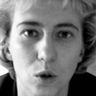

In [66]:
from PIL import Image
Image.fromarray(first_2d)